##### Unknown 값을 분석에 써도 되는지 검증을 하는 도중 문제가 발생하여 처음부터 다시 시작
##### 문제 : 나는 Unknown 그룹이 age만 결측인 그룹이라고 생각하면서 분석에 사용함. 그러나 팀원분과 공유 해보니 모든 값이 없는 그룹이라고 하셔서 검증하면서 다시 할 예정 

In [1]:
import pandas as pd
#경로는 꼭 새롭게 설정 후 데이터가 가져와졌는지 확인 먼저 필요함
articles = pd.read_csv("../../data/articles_hm.csv")
customers = pd.read_csv("../../data/customer_hm.csv")
transactions = pd.read_csv("../../data/transactions_hm.csv")

##### 원본 데이터를 지키기 위해 copy

In [2]:
#2. 원본 데이터 지키기 위해서 copy
df_cust = customers.copy()
df_tran = transactions.copy()
df_art = articles.copy()

##### 오프라인 , 온라인의 비중 확인

In [3]:
df_tran["sales_channel_id"].value_counts(dropna=False)

sales_channel_id
2    729192
1    319383
Name: count, dtype: int64

##### join을 위해서 연결할 때 쓸 id 들의 타입과 문자열의 앞부분을 지정된 길이까지 '0'으로 채워주는 메서드(zfill)을 사용하여 맞춰줌

In [4]:
#3.join을 위해 동일한 타입으로 변환
df_tran['customer_id']= df_tran['customer_id'].astype(str).str.zfill(10)
df_cust['customer_id']= df_cust['customer_id'].astype(str).str.zfill(10)

df_tran['article_id']= df_tran['article_id'].astype(str).str.zfill(10)
df_art['article_id'] = df_art['article_id'].astype(str).str.zfill(10)

##### df_tran에서 전체 값이 중복인 데이터 수 확인

In [5]:
#4. 데이터 크기 및 중복 확인

print("df_tran (복사본) 크기:", df_tran.shape)
print("중복 데이터 수:", df_tran.duplicated().sum())

df_tran (복사본) 크기: (1048575, 5)
중복 데이터 수: 8474


##### 중복된 거래를 제거하려 결과 왜곡 방지

In [6]:
#5.중복된 거래 로그를 제거하여 분석 결과의 왜곡을 방지
df_tran.drop_duplicates(inplace=True)
print('중복 데이터 수:', df_tran.duplicated().sum())

중복 데이터 수: 0


##### 날짜 타입을 분석할 때 쓰기 편하게 datetime함수를 사용하여 변환

In [7]:
#6. 날짜 타입 변환
df_tran['t_dat'] = pd.to_datetime(df_tran['t_dat'], format='%Y-%m-%d')
# 타입 변환 확인
df_tran.info()

<class 'pandas.DataFrame'>
Index: 1040101 entries, 0 to 1048574
Data columns (total 5 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   t_dat             1040101 non-null  datetime64[us]
 1   customer_id       1040101 non-null  str           
 2   article_id        1040101 non-null  str           
 3   price             1040101 non-null  float64       
 4   sales_channel_id  1040101 non-null  int64         
dtypes: datetime64[us](1), float64(1), int64(1), str(2)
memory usage: 47.6 MB


##### sales_channel_id 컬럼을 이용하여 파생 컬럼을 만들고, 값들을 보기 편하게 변환

In [8]:
#7. 판매 채널 컬럼 생성 및 값 변환
df_tran["channel"] = df_tran["sales_channel_id"].map({1: "오프라인", 2: "온라인"})
df_tran["channel"].value_counts() 
numbs = df_tran["channel"].value_counts()
print("온라인:", f"{numbs['온라인']:,}")
print("오프라인:", f"{numbs['오프라인']:,}")
print("전체 거래 건수:", f"{df_tran.shape[0]:,}")

온라인: 721,488
오프라인: 318,613
전체 거래 건수: 1,040,101


In [9]:
#변환 확인
df_tran.head()

,t_dat,customer_id,article_id,price,sales_channel_id,channel
0,2019-11-05,3e2b60b679e62fb49516105b975560082922011dd752ec...,0698328010,0.016932,2,온라인
1,2019-05-22,89647ac2274f54c770aaa4b326e0eea09610c252381f37...,0760597002,0.033881,2,온라인
2,2019-05-10,2ebe392150feb60ca89caa8eff6c08b7ef1138cd6fdc71...,0488561032,0.016932,2,온라인
3,2019-08-26,7b3205de4ca17a339624eb5e3086698e9984eba6b47c56...,0682771001,0.033881,2,온라인
4,2019-08-10,3b77905de8b32045f08cedb79200cdfa477e9562429a39...,0742400033,0.003220,1,오프라인


##### 가격 분포 데이터 확인

In [10]:
#8. 가격 데이터 분포 확인
df_tran['price'].describe() 
print("price가 0.1 이상:", len(df_tran[df_tran["price"] >= 0.1]))
print("price가 0.2 이상:", len(df_tran[df_tran["price"] >= 0.2]))
print("price가 0.3 이상:", len(df_tran[df_tran["price"] >= 0.3]))
print("price가 0.4 이상:", len(df_tran[df_tran["price"] >= 0.4]))
print("price가 0.5 이상:", len(df_tran[df_tran["price"] >= 0.5]))

price가 0.1 이상: 10704
price가 0.2 이상: 719
price가 0.3 이상: 126
price가 0.4 이상: 29
price가 0.5 이상: 2


##### 나중에 분석할 때 고가 제품에 대해 인사이트를 도출할 수도 있지 않을까 싶어서 만듦.

In [11]:
#9. 고가 거래 분리 및 채널 확인
high_price_transactions = df_tran[df_tran["price"] >= 0.4]
high_price_transactions['sales_channel_id'].replace({1: 'Offline', 2: 'Online'}).value_counts() 

sales_channel_id
Online    29
Name: count, dtype: int64

##### 이 데이터가 2019/01/01~2019/12/31 1년치 데이터라서 월별로 분석하고자 년월 파생 컬럼 생성

In [12]:
#10.월 컬럼 생성 및 확인
df_tran['year_month'] = df_tran['t_dat'].dt.to_period('M') 
df_tran.head()

,t_dat,customer_id,article_id,price,sales_channel_id,channel,year_month
0,2019-11-05,3e2b60b679e62fb49516105b975560082922011dd752ec...,0698328010,0.016932,2,온라인,2019-11
1,2019-05-22,89647ac2274f54c770aaa4b326e0eea09610c252381f37...,0760597002,0.033881,2,온라인,2019-05
2,2019-05-10,2ebe392150feb60ca89caa8eff6c08b7ef1138cd6fdc71...,0488561032,0.016932,2,온라인,2019-05
3,2019-08-26,7b3205de4ca17a339624eb5e3086698e9984eba6b47c56...,0682771001,0.033881,2,온라인,2019-08
4,2019-08-10,3b77905de8b32045f08cedb79200cdfa477e9562429a39...,0742400033,0.003220,1,오프라인,2019-08


##### 월별 매출액 계산하여 확인
##### 1년 중 가장 많은 거래를 한 날짜가 2019/09/28 라서 9월 매출이 제일 클거라고 생각했는데 예상외로 6월 매출이 가장 큼

In [13]:
#11.월별 거래 매출액 계산
monthly_sales = df_tran.groupby('year_month').size()
monthly_price = df_tran.groupby('year_month')['price'].sum()
print(monthly_price)

year_month
2019-01    2129.926131
2019-02    1989.217641
2019-03    2374.905504
2019-04    2703.443538
2019-05    2748.199469
2019-06    3088.776976
2019-07    2552.035334
2019-08    1943.422489
2019-09    2559.226862
2019-10    2358.486793
2019-11    2463.769270
2019-12    1985.492149
Freq: M, Name: price, dtype: float64


In [14]:
#12. 최고 매출 월 
best_month = monthly_price.idxmax()
best_value = monthly_price.max()
print("가장 매출이 높은 달:", best_month)
print("그 달의 매출:", best_value) 

가장 매출이 높은 달: 2019-06
그 달의 매출: 3088.776976142


In [15]:
df_tran["price"].min()

np.float64(0.000237288)

In [16]:
df_tran.shape

(1040101, 7)

##### df_tran 전처리 끝- df_art 전처리 시작

In [17]:
df_art['detail_desc'] = df_art['detail_desc'].fillna('No Description')

In [18]:
cols_to_drop = [
    'product_type_no', 
    'graphical_appearance_no', 
    'colour_group_code', 
    'perceived_colour_value_id',
    'perceived_colour_master_id',
    'department_no',
    'index_code',
    'index_group_no',
    'section_no',
    'garment_group_no'
]
articles_cleaned = df_art.drop(columns=cols_to_drop)

In [19]:
#시즌 별 매핑 (product_season) / 시즌성 구분을 위한 키워드 정의
def get_season(row):
    # section_name과 prod_name을 합쳐서 판단
    text = (str(row['section_name']) + " " + str(row['prod_name'])).lower()
    group = str(row['product_group_name']).lower()
    
    # 1. FW 
    fw_keywords = [
        'outerwear', 'nightwear', 'socks', 'tights', 'knitted', 
        'jacket', 'coat', 'hoodie', 'sweatshirt', 'scarf', 'gloves', 
        'boots', 'heavy', 'fur', 'wool', 'cardigan', 'winter'
    ]
    
    # 2. SS
    ss_keywords = [
        'swimwear', 'sport', 'shorts', 'sandals', 'sleeveless', 
        'tank', 'mini', 'beach', 'summer', 'sun', 'flip flop', 
        'skirt', 'dress'
    ]
    
    if any(kw in text for kw in fw_keywords) or group in ['items of clothing']:
        return 'FW'
    elif any(kw in text for kw in ss_keywords) or group in ['swimwear']:
        return 'SS'
    else:
        return 'All-Season'

In [23]:
#파생변수 생성 및 axis=1로 왼쪽에서 오른쪽으로(행 방향) 읽도록 조정
df_art['product_season'] = df_art.apply(get_season, axis=1)
## section_name 열과 prod_name 열의 정보를 동시에 꺼내와야 해서 axis=1로 왼쪽에서 오른쪽으로(행 방향) 읽어야 함. ∴ axis=1 조건 필수

In [24]:
# 3. 신상품/트렌드 여부 파생변수
def check_newness(row):
    text = (str(row['prod_name']) + " " + str(row['detail_desc'])).lower()
    new_keywords = ['new', 'collection', 'latest', 'trend', 'exclusive']
    
    if any(kw in text for kw in new_keywords):
        return 'New_Arrival'
    return 'Regular_Carryover'

In [25]:
df_art['is_new'] = df_art.apply(check_newness, axis=1)

In [26]:
# 4. 색상 톤 그룹화 
def get_color_tone(color):
    color = str(color).lower()
    dark_colors = ['black', 'dark blue', 'dark grey', 'dark red', 'navy blue', 'dark green', 'anthracite']
    light_colors = ['white', 'light beige', 'off white', 'light pink', 'light blue', 'yellowish brown']
    
    if any(dc in color for dc in dark_colors):
        return 'Dark_Tone'
    elif any(lc in color for lc in light_colors):
        return 'Light_Tone'
    else:
        return 'Neutral_Tone'

In [27]:
df_art['color_tone'] = df_art['colour_group_name'].apply(get_color_tone)

##### df_art 테이블 전처리 끝 - df_cust 테이블 전처리 시작

In [28]:
df_cust.isnull().sum()

customer_id               0
FN                        0
Active                    0
club_member_status        0
fashion_news_frequency    1
age                       0
dtype: int64

##### 들어가기 전에 df_art 테이블 잘 되어 있는지 확인

In [29]:
df_art.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc,product_season,is_new,color_tone
0,0108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.,All-Season,Regular_Carryover,Dark_Tone
1,0108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.,All-Season,Regular_Carryover,Light_Tone
2,0108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.,All-Season,Regular_Carryover,Light_Tone
3,0110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde...",All-Season,Regular_Carryover,Dark_Tone
4,0110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde...",All-Season,Regular_Carryover,Light_Tone


##### 결측치 데이터 확인

In [30]:
missing_data = df_cust[df_cust['fashion_news_frequency'].isnull()]
missing_data

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age
876108,a79d9cbfaceb0d25a91caccfad167d4d6391fd5bb4292b...,1,0,ACTIVE,NaN,38


In [31]:
# FN이 1이고, Active가 0인 fashion_news_frequency의 고유값별 빈도 확인
df_cust[(df_cust['FN'] == 1) & (df_cust['Active'] == 0)
]['fashion_news_frequency'].value_counts(dropna=False)

fashion_news_frequency
Regularly    9598
NONE          238
Monthly        27
NaN             1
Name: count, dtype: int64

In [32]:
# 결측치 'Regularly'으로 채우기
df_cust['fashion_news_frequency'] = df_cust['fashion_news_frequency'].fillna('Regularly')

In [33]:
#  (문자형 정수형으로 매핑) 사전 정의
status_map = {'ACTIVE': 2, 'PRE-CREATE': 1, 'LEFT CLUB': 0}
frequency_map = {'Regularly': 2, 'Monthly': 1, 'NONE': 0}

In [34]:
#  매핑 적용
df_cust['club_member_status'] = df_cust['club_member_status'].map(status_map)
df_cust['fashion_news_frequency'] = df_cust['fashion_news_frequency'].map(frequency_map)

In [35]:
# 나이를 나이대별로 나눠 파생변수 생성
def cate_age(age):
    if age < 20: return '10대'
    elif age < 30: return '20대'
    elif age < 40: return '30대'
    elif age < 50: return '40대'
    elif age < 60: return'50대'
    else: return '60대 이상'

df_cust['age_segment'] = df_cust['age'].apply(cate_age)

##### 모든 테이블 전처리 끝 join 시작

In [36]:
#12. 고객 정보와 거래 로그를 customer_id 기준으로 조인
df_merged = pd.merge(df_tran, df_cust, on='customer_id', how='left')

In [37]:
print(f"조인 후 데이터 크기: {df_merged.shape}")
print(f"고객 정보가 없는 거래 건수: {df_merged['age_segment'].isnull().sum()}")

조인 후 데이터 크기: (1040101, 13)
고객 정보가 없는 거래 건수: 233734


##### 고객 정보가 없는 거래 건수를 확인하여 검증 시작

In [38]:
# 1. 고객 매칭에 실패한(나이가 없는) 데이터만 추출
missing_profile = df_merged[df_merged['age'].isnull()]

# 2. 이 데이터들 내에서 컬럼별 결측치 합계 확인
print("### [감식 결과] 컬럼별 정보 부재 현황 ###")
print(missing_profile.isnull().sum())

### [감식 결과] 컬럼별 정보 부재 현황 ###
t_dat                          0
customer_id                    0
article_id                     0
price                          0
sales_channel_id               0
channel                        0
year_month                     0
FN                        233734
Active                    233734
club_member_status        233734
fashion_news_frequency    233734
age                       233734
age_segment               233734
dtype: int64


In [39]:
# 1. 고객 매칭에 실패한(나이가 없는) 데이터만 추출
missing_profile = df_merged[df_merged['age_segment'].isnull()]

# 2. 이 데이터들 내에서 컬럼별 결측치 합계 확인
print("### [감식 결과] 컬럼별 정보 부재 현황 ###")
print(missing_profile.isnull().sum())

### [감식 결과] 컬럼별 정보 부재 현황 ###
t_dat                          0
customer_id                    0
article_id                     0
price                          0
sales_channel_id               0
channel                        0
year_month                     0
FN                        233734
Active                    233734
club_member_status        233734
fashion_news_frequency    233734
age                       233734
age_segment               233734
dtype: int64


In [40]:
# 여러 컬럼의 결측치를 동시에 비교해보기
print(df_merged[['age', 'club_member_status', 'FN','Active','fashion_news_frequency','age_segment']].isnull().sum())

age                       233734
club_member_status        233734
FN                        233734
Active                    233734
fashion_news_frequency    233734
age_segment               233734
dtype: int64


##### 결과는 모든 컬럼의 값이 널로 나왔어. 그런데 궁금한게 어째서 아이디는 있는데 모든 값이 없지...? left 조인을 했으니까 tran에는 아이디가 있어서 매칭 안된 아이디가 남았다는건 cust에는 없어서 남았다는건데 거래테이블이 가짜이거나 잘못된 걸 수도 있다고 생각할 수 도 있는거 아닌가?

In [41]:
# 고객 정보가 없는(매칭 실패) 데이터만 추출
unmatched = df_merged[df_merged['age_segment'].isnull()]

print(f"### [Art 조인 전 최종 검증] ###")
print(f"1. 전체 미매칭 거래 건수: {len(unmatched)}건")
print(f"2. 실제 매출액(Price) 합계: {unmatched['price'].sum():.4f}")
print(f"3. 평균 객단가: {unmatched['price'].mean():.4f}")
print(f"4. 유효한 상품 ID(article_id) 종류 수: {unmatched['article_id'].nunique()}개")

### [Art 조인 전 최종 검증] ###
1. 전체 미매칭 거래 건수: 233734건
2. 실제 매출액(Price) 합계: 6498.6379
3. 평균 객단가: 0.0278
4. 유효한 상품 ID(article_id) 종류 수: 35442개


##### 고객 프로필 정보는 없지만 실제 매출액과 상품 ID가 정상적으로 기록된 22%의 유효 거래를 확인했습니다. 이들은 가짜 데이터가 아니라 '정보 미보유 실구매자'입니다. 이들을 분석에서 제외하면 우리 브랜드의 실제 시장 영향력을 20% 이상 과소평가하게 되므로, 'Unknown' 그룹으로 명시하여 분석에 포함하는 것이 맞다고 판단했습니다. 
##### 이들을 'Unknown' 그룹으로 두고 프로필 미보유 고객으로 생각할 것이며 분석을 진행하여 전체적인 트렌드 분석을 하려고 합니다.

In [43]:
# 1. 고객 정보 관련 컬럼들 리스트 (나이, 등급, 우편번호 등)
customer_cols = ['age', 'club_member_status', 'FN','Active','fashion_news_frequency','age_segment']

# 2. 아이디는 있는데 위 컬럼들이 비어있는 행들에 대해 'Unknown'으로 채우기
# (숫자인 age는 0이나 특정 숫자로 채워야 할 수도 있지만, 분석 편의상 전체를 문자열로 다룰 때 유용합니다)
for col in customer_cols:
    df_merged[col] = df_merged[col].fillna('Unknown')

# 3. 결과 확인
print("### 빈칸 채우기 완료 후 데이터 샘플 ###")
df_merged[df_merged['age_segment'] == 'Unknown'][customer_cols].head()

### 빈칸 채우기 완료 후 데이터 샘플 ###


,age,club_member_status,FN,Active,fashion_news_frequency,age_segment
5,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
7,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
9,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
11,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
20,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown


In [44]:
# 1. 연령대 정보가 없는 고객을 'Unknown'으로 채우기
# 이렇게 하면 데이터가 삭제되지 않고 'Unknown'이라는 연령대로 분류됩니다.
df_final = df_merged.copy()
df_final['age_segment'] = df_final['age_segment'].fillna('Unknown')

# 2. 결과 확인: 'Unknown' 그룹이 얼마나 큰지 한눈에 보여주기
age_summary = df_final['age_segment'].value_counts()
print("### 연령대별 고객 분포 (정보 미상 포함) ###")
print(age_summary)

# 3. 시각화 준비: 이 데이터를 그대로 막대 그래프로 그리면 'Unknown'의 비중이 시각적으로 확 드러납니다.

### 연령대별 고객 분포 (정보 미상 포함) ###
age_segment
20대        329534
Unknown    233734
30대        164457
50대        135167
40대        125774
60대 이상      37794
10대         13641
Name: count, dtype: int64


In [45]:
# 1. 원하는 출력 순서 정의 (10대부터 Unknown까지)
ordered_index = ['10대', '20대', '30대', '40대', '50대', '60대 이상', 'Unknown']

# 2. 정해진 순서대로 다시 집계 (reindex 사용)
# 이전에 실행한 결과가 섞여 있어도, 이 코드가 순서를 강제로 맞춰줍니다.
age_summary_ordered = df_final['age_segment'].value_counts().reindex(ordered_index)

print("### 연령대별 고객 분포 (정해진 순서대로) ###")
print(age_summary_ordered)

### 연령대별 고객 분포 (정해진 순서대로) ###
age_segment
10대         13641
20대        329534
30대        164457
40대        125774
50대        135167
60대 이상      37794
Unknown    233734
Name: count, dtype: int64


In [46]:
# 1. groupby를 이용해 연령대별, 채널별 거래 건수 집계
# unstack()을 하면 채널 번호(1, 2)가 컬럼으로 올라옵니다.
channel_counts = df_final.groupby(['age_segment', 'sales_channel_id']).size().unstack(fill_value=0)

# 2. 컬럼 이름을 이해하기 쉽게 변경 
channel_counts = channel_counts.rename(columns={1: 'Offline(1)', 2: 'Online(2)'})

# 3. 아까 정한 순서대로 행 정렬
ordered_index = ['10대', '20대', '30대', '40대', '50대', '60대 이상', 'Unknown']
channel_counts = channel_counts.loc[ordered_index]

# 4. 비중(%) 계산: 각 연령대 내에서 온/오프라인이 차지하는 비율
channel_perc = channel_counts.div(channel_counts.sum(axis=1), axis=0) * 100

print("### 연령대별 온/오프라인 이용 비중 (%) ###")
channel_perc.round(1)

### 연령대별 온/오프라인 이용 비중 (%) ###


sales_channel_id,Offline(1),Online(2)
age_segment,,
10대,42.1,57.9
20대,29.9,70.1
30대,25.0,75.0
40대,33.2,66.8
50대,33.9,66.1
60대 이상,35.9,64.1
Unknown,30.7,69.3


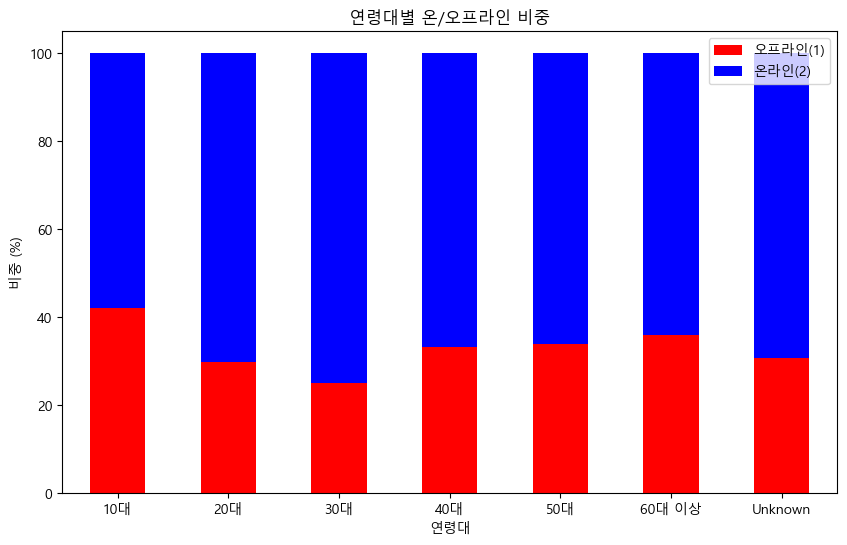

In [47]:
import matplotlib.pyplot as plt

# 1. 한글 나오게 설정 
plt.rc('font', family='Malgun Gothic')

# 2. 아주 정직하게 막대 그래프 그리기
# color=['red', 'blue'] 로 오프라인과 온라인을 구분해요!
channel_perc.plot(kind='bar', stacked=True, color=['red', 'blue'], figsize=(10, 6))

# 3. 제목이랑 축 이름만 한글로 딱!
plt.title('연령대별 온/오프라인 비중')
plt.xlabel('연령대')
plt.ylabel('비중 (%)')
plt.legend(title=None, labels=['오프라인(1)', '온라인(2)'])
# 4. 글자 똑바로 세우기
plt.xticks(rotation=0)

plt.show()

In [48]:
# 1. 연령대별 매출 합계(sum)와 평균(mean) 계산
age_price_analysis = df_final.groupby('age_segment')['price'].agg(['sum', 'mean'])

# 2. 우리가 정한 순서대로 정렬 
ordered_index = ['10대', '20대', '30대', '40대', '50대', '60대 이상', 'Unknown']
# age_price_analysis라는 바구니에서 ordered_index 순서대로 행을 골라옵니다.
age_price_analysis = age_price_analysis.loc[ordered_index]

# 3. 보기 편하게 컬럼명 변경
age_price_analysis.columns = ['총 매출액', '평균 객단가']

# 4. 결과 출력
print("### 연령대별 매출 성과 분석 ###")
age_price_analysis.round(4)

### 연령대별 매출 성과 분석 ###


,총 매출액,평균 객단가
age_segment,,
10대,322.2635,0.0236
20대,8926.8097,0.0271
30대,4600.6703,0.0280
40대,3454.6730,0.0275
50대,3944.0681,0.0292
60대 이상,1149.7797,0.0304
Unknown,6498.6379,0.0278


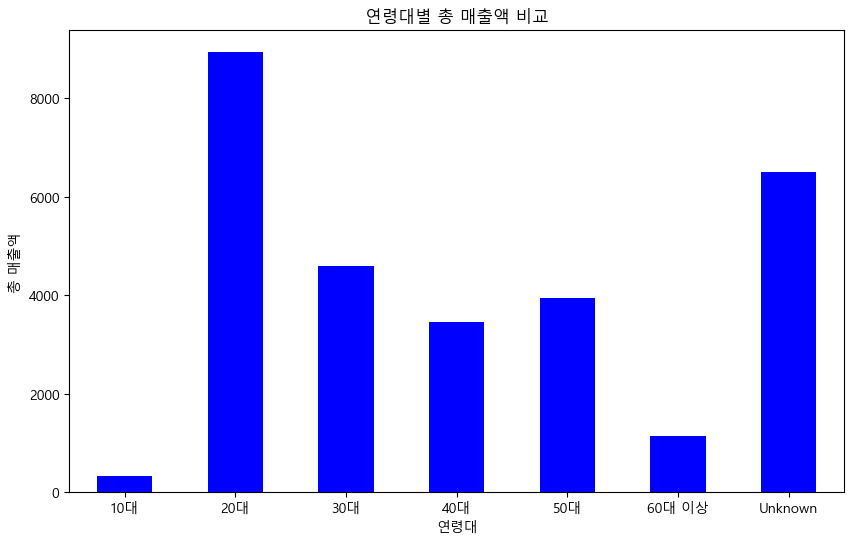

In [49]:
import matplotlib.pyplot as plt

# 1. 한글 설정 (VS Code/윈도우)
plt.rc('font', family='Malgun Gothic')

# 2. 그래프 그리기
plt.figure(figsize=(10, 6))
age_price_analysis['총 매출액'].plot(kind='bar', color='blue')

# 3. 축 설정 (X-Y축 느낌만 딱!)
plt.title('연령대별 총 매출액 비교')
plt.xlabel('연령대')
plt.ylabel('총 매출액')
plt.xticks(rotation=0) # 글자 똑바로 세우기

plt.show()

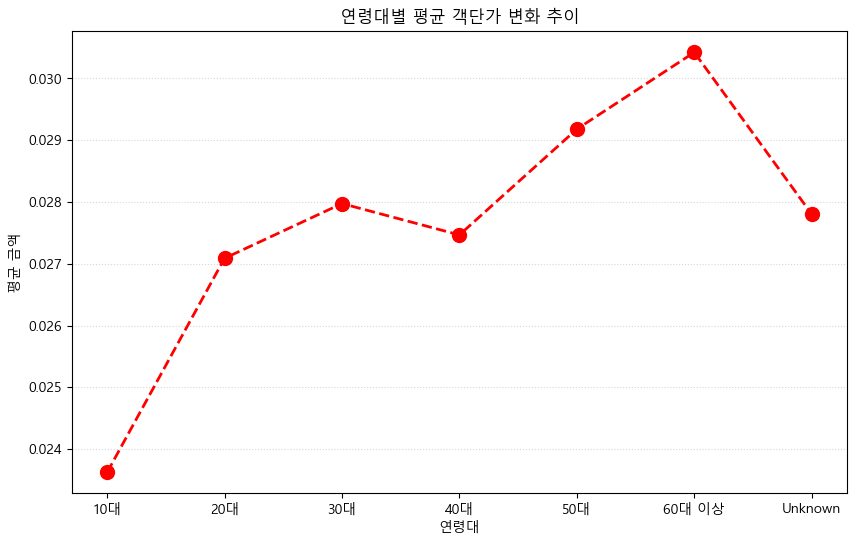

In [50]:
import matplotlib.pyplot as plt

# 1. 한글 설정 (VS Code/윈도우)
plt.rc('font', family='Malgun Gothic')

# 2. 그래프 크기 설정
plt.figure(figsize=(10, 6))

# 3. 점과 점선을 함께 그리기
# 'ro--' : r(빨간색), o(동그란 점), --(점선)을 한꺼번에 적용하겠다는 뜻이에요!
plt.plot(age_price_analysis.index, age_price_analysis['평균 객단가'], 'ro--', markersize=10, linewidth=2)

# 4. 축 이름과 제목
plt.title('연령대별 평균 객단가 변화 추이')
plt.xlabel('연령대')
plt.ylabel('평균 금액')

# 5. 디테일 조정 (글자 똑바로 세우고 연한 그리드 추가)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle=':', alpha=0.5)

plt.show()

In [51]:
# df_final(고객+거래)과 df_art(상품)를 article_id 기준으로 합치기
# 'left'를 쓰는 이유는 거래 기록(df_final)을 하나도 놓치지 않기 위해서
df_trend = pd.merge(df_final, df_art, on='article_id', how='left')

# 잘 합쳐졌는지, 상품 카테고리 컬럼이 생겼는지 확인해볼까요?
df_trend.columns
df_trend.head()

,t_dat,customer_id,article_id,price,sales_channel_id,channel,year_month,FN,Active,club_member_status,...,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc,product_season,is_new,color_tone
0,2019-11-05,3e2b60b679e62fb49516105b975560082922011dd752ec...,0698328010,0.016932,2,온라인,2019-11,1.0,1.0,2.0,...,2,Divided,53,Divided Collection,1005,Jersey Fancy,Top in lightweight sweatshirt fabric with drop...,All-Season,Regular_Carryover,Dark_Tone
1,2019-05-22,89647ac2274f54c770aaa4b326e0eea09610c252381f37...,0760597002,0.033881,2,온라인,2019-05,0.0,0.0,2.0,...,1,Ladieswear,6,Womens Casual,1005,Jersey Fancy,"Short-sleeved blouse in stretch, textured jers...",All-Season,Regular_Carryover,Light_Tone
2,2019-05-10,2ebe392150feb60ca89caa8eff6c08b7ef1138cd6fdc71...,0488561032,0.016932,2,온라인,2019-05,1.0,1.0,2.0,...,3,Menswear,21,Contemporary Casual,1025,Shorts,Knee-length shorts in soft washed cotton with ...,All-Season,Regular_Carryover,Dark_Tone
3,2019-08-26,7b3205de4ca17a339624eb5e3086698e9984eba6b47c56...,0682771001,0.033881,2,온라인,2019-08,0.0,0.0,2.0,...,1,Ladieswear,65,Womens Big accessories,1019,Accessories,Shopper in grained imitation leather with two ...,All-Season,Regular_Carryover,Dark_Tone
4,2019-08-10,3b77905de8b32045f08cedb79200cdfa477e9562429a39...,0742400033,0.003220,1,오프라인,2019-08,0.0,0.0,2.0,...,3,Menswear,26,Men Underwear,1021,Socks and Tights,"Socks in a soft, fine-knit cotton blend with r...",SS,Regular_Carryover,Light_Tone
